In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


### Download the IMDB dataset
Use multi-hot-encoding

In [5]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences)), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

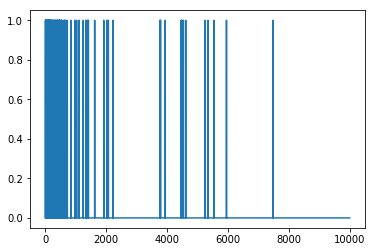

In [7]:
_ = plt.plot(train_data[0])

### Demonstrate overfitting

In [10]:
baseline_model = keras.Sequential([
    # 'input_shape' is only required here so that '.summary' works 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.4739 - acc: 0.8062 - binary_crossentropy: 0.4739 - val_loss: 0.3298 - val_acc: 0.8759 - val_binary_crossentropy: 0.3298
Epoch 2/20
 - 1s - loss: 0.2450 - acc: 0.9112 - binary_crossentropy: 0.2450 - val_loss: 0.2838 - val_acc: 0.8869 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 1s - loss: 0.1808 - acc: 0.9364 - binary_crossentropy: 0.1808 - val_loss: 0.2899 - val_acc: 0.8848 - val_binary_crossentropy: 0.2899
Epoch 4/20
 - 1s - loss: 0.1448 - acc: 0.9494 - binary_crossentropy: 0.1448 - val_loss: 0.3161 - val_acc: 0.8777 - val_binary_crossentropy: 0.3161
Epoch 5/20
 - 1s - loss: 0.1204 - acc: 0.9597 - binary_crossentropy: 0.1204 - val_loss: 0.3445 - val_acc: 0.8739 - val_binary_crossentropy: 0.3445
Epoch 6/20
 - 1s - loss: 0.1003 - acc: 0.9685 - binary_crossentropy: 0.1003 - val_loss: 0.3766 - val_acc: 0.8704 - val_binary_crossentropy: 0.3766
Epoch 7/20
 - 1s - loss: 0.0841 - acc: 0.9752 - binary_crossentropy:

### Create a smaller model

In [12]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [13]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 1s - loss: 0.6407 - acc: 0.6295 - binary_crossentropy: 0.6407 - val_loss: 0.5970 - val_acc: 0.7152 - val_binary_crossentropy: 0.5970
Epoch 2/20
 - 1s - loss: 0.5514 - acc: 0.7783 - binary_crossentropy: 0.5514 - val_loss: 0.5387 - val_acc: 0.7854 - val_binary_crossentropy: 0.5387
Epoch 3/20
 - 1s - loss: 0.4918 - acc: 0.8428 - binary_crossentropy: 0.4918 - val_loss: 0.4886 - val_acc: 0.8403 - val_binary_crossentropy: 0.4886
Epoch 4/20
 - 1s - loss: 0.4348 - acc: 0.8884 - binary_crossentropy: 0.4348 - val_loss: 0.4557 - val_acc: 0.8746 - val_binary_crossentropy: 0.4557
Epoch 5/20
 - 1s - loss: 0.3946 - acc: 0.9166 - binary_crossentropy: 0.3946 - val_loss: 0.4400 - val_acc: 0.8817 - val_binary_crossentropy: 0.4400
Epoch 6/20
 - 1s - loss: 0.3655 - acc: 0.9334 - binary_crossentropy: 0.3655 - val_loss: 0.4362 - val_acc: 0.8735 - val_binary_crossentropy: 0.4362
Epoch 7/20
 - 1s - loss: 0.3405 - acc: 0.9444 - binary_crossentropy:

### Create a bigger model

In [14]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.3438 - acc: 0.8526 - binary_crossentropy: 0.3438 - val_loss: 0.2908 - val_acc: 0.8815 - val_binary_crossentropy: 0.2908
Epoch 2/20
 - 6s - loss: 0.1320 - acc: 0.9523 - binary_crossentropy: 0.1320 - val_loss: 0.3467 - val_acc: 0.8674 - val_binary_crossentropy: 0.3467
Epoch 3/20
 - 6s - loss: 0.0383 - acc: 0.9895 - binary_crossentropy: 0.0383 - val_loss: 0.4482 - val_acc: 0.8674 - val_binary_crossentropy: 0.4482
Epoch 4/20
 - 6s - loss: 0.0062 - acc: 0.9994 - binary_crossentropy: 0.0062 - val_loss: 0.5889 - val_acc: 0.8696 - val_binary_crossentropy: 0.5889
Epoch 5/20
 - 6s - loss: 7.1929e-04 - acc: 1.0000 - binary_crossentropy: 7.1929e-04 - val_loss: 0.6708 - val_acc: 0.8733 - val_binary_crossentropy: 0.6708
Epoch 6/20
 - 6s - loss: 2.2726e-04 - acc: 1.0000 - binary_crossentropy: 2.2726e-04 - val_loss: 0.7092 - val_acc: 0.8725 - val_binary_crossentropy: 0.7092
Epoch 7/20
 - 6s - loss: 1.4293e-04 - acc: 1.0000 - 

### Plot the training and validation loss

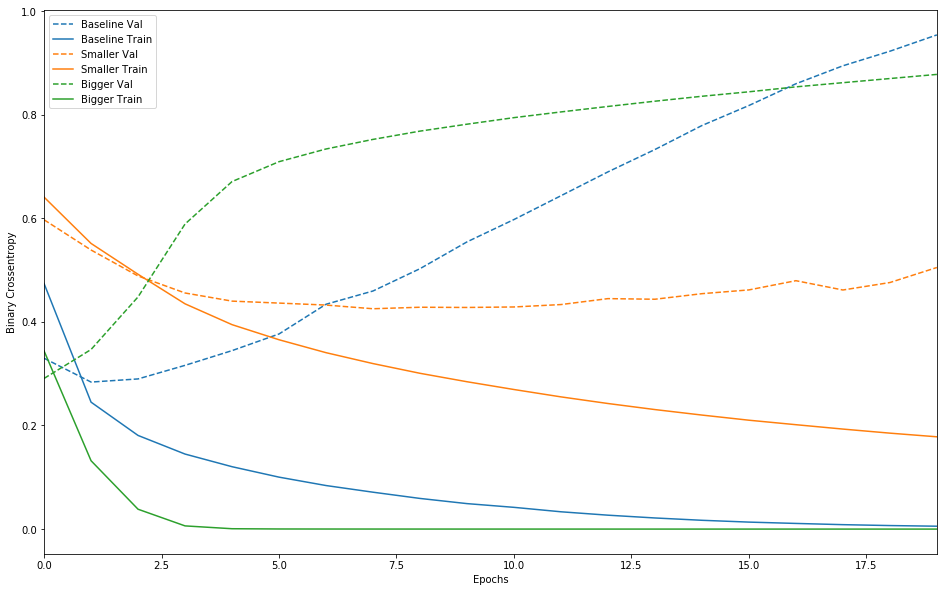

In [16]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

### Add regularizer

In [17]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 1s - loss: 0.5027 - acc: 0.8118 - binary_crossentropy: 0.4612 - val_loss: 0.3643 - val_acc: 0.8800 - val_binary_crossentropy: 0.3204
Epoch 2/20
 - 1s - loss: 0.2923 - acc: 0.9132 - binary_crossentropy: 0.2444 - val_loss: 0.3354 - val_acc: 0.8871 - val_binary_crossentropy: 0.2847
Epoch 3/20
 - 1s - loss: 0.2475 - acc: 0.9325 - binary_crossentropy: 0.1945 - val_loss: 0.3416 - val_acc: 0.8848 - val_binary_crossentropy: 0.2868
Epoch 4/20
 - 1s - loss: 0.2239 - acc: 0.9422 - binary_crossentropy: 0.1675 - val_loss: 0.3564 - val_acc: 0.8804 - val_binary_crossentropy: 0.2989
Epoch 5/20
 - 1s - loss: 0.2121 - acc: 0.9483 - binary_crossentropy: 0.1529 - val_loss: 0.3684 - val_acc: 0.8782 - val_binary_crossentropy: 0.3083
Epoch 6/20
 - 1s - loss: 0.1997 - acc: 0.9530 - binary_crossentropy: 0.1388 - val_loss: 0.3849 - val_acc: 0.8743 - val_binary_crossentropy: 0.3236
Epoch 7/20
 - 1s - loss: 0.1931 - acc: 0.9561 - binary_crossentropy:

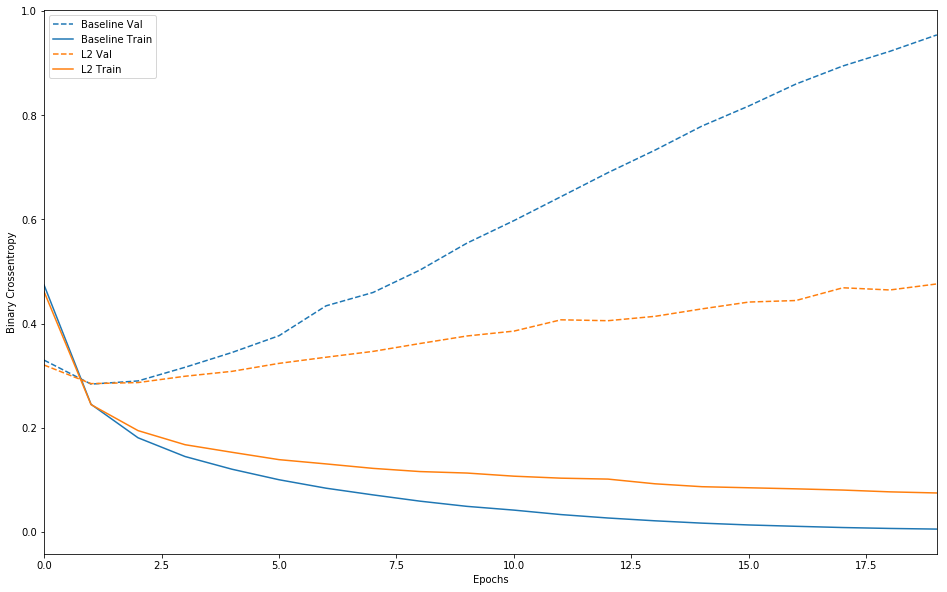

In [18]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### Add dropout

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 1s - loss: 0.6385 - acc: 0.6270 - binary_crossentropy: 0.6385 - val_loss: 0.5178 - val_acc: 0.8368 - val_binary_crossentropy: 0.5178
Epoch 2/20
 - 1s - loss: 0.4893 - acc: 0.8082 - binary_crossentropy: 0.4893 - val_loss: 0.3827 - val_acc: 0.8792 - val_binary_crossentropy: 0.3827
Epoch 3/20
 - 1s - loss: 0.3920 - acc: 0.8678 - binary_crossentropy: 0.3920 - val_loss: 0.3261 - val_acc: 0.8844 - val_binary_crossentropy: 0.3261
Epoch 4/20
 - 1s - loss: 0.3271 - acc: 0.8994 - binary_crossentropy: 0.3271 - val_loss: 0.3041 - val_acc: 0.8846 - val_binary_crossentropy: 0.3041
Epoch 5/20
 - 1s - loss: 0.2858 - acc: 0.9120 - binary_crossentropy: 0.2858 - val_loss: 0.2946 - val_acc: 0.8853 - val_binary_crossentropy: 0.2946
Epoch 6/20
 - 1s - loss: 0.2532 - acc: 0.9234 - binary_crossentropy: 0.2532 - val_loss: 0.2996 - val_acc: 0.8848 - val_binary_crossentropy: 0.2996
Epoch 7/20
 - 1s - loss: 0.2242 - acc: 0.9314 - binary_crossentropy:

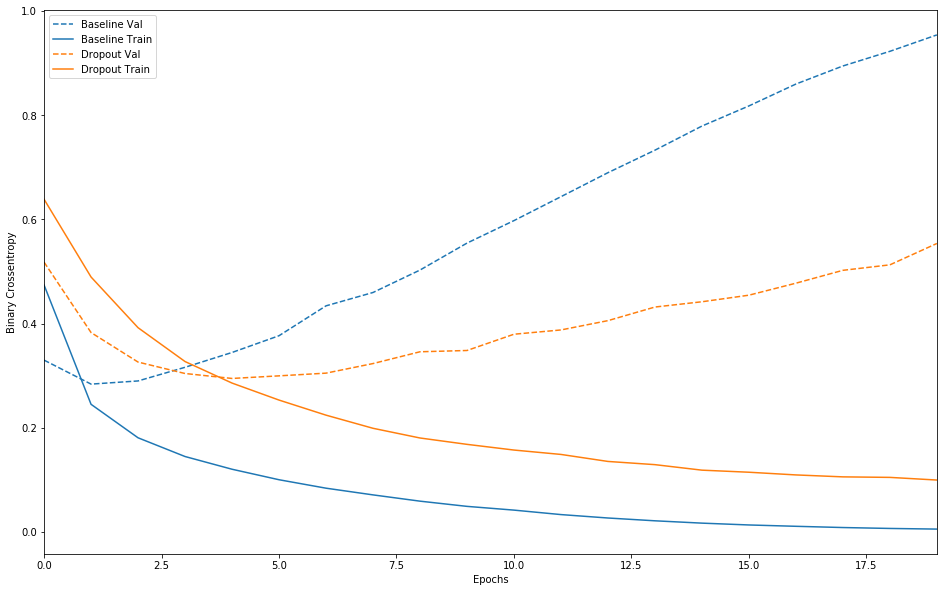

In [20]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])